In [179]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import pandas as pd
import random
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
np.set_printoptions(suppress=True)

In [168]:
#function to load the data and randomise it and normalise it further
def loadData():
    df = pd.read_csv('abalone.data', sep=",", index_col=False)
    df.columns = ["sex", "length", "diameter","height","whole weight","shucked weight","viscera weight","shell weight","rings"]
    df = df.sample(frac=1).reset_index(drop=True)
    #mapping male=0, female=1, infant=2
    data=np.array(df)
    for i in range(len(data)):
        if(data[i][0]=='M'):
            data[i][0]=2
        elif(data[i][0]=='F'):
            data[i][0]=1
        else:
            data[i][0]=0
    data=np.array(data,dtype=float)
        
#     print(df)
#     print(data)
#     normalise(data)
    x=data[:,:8]
    y=data[:,-1]
#     print(x)
#     print(y)
    return x,y
    
    
    
    

In [169]:
#to normalise data, gets big data into range
def normalise(data):
    for i in range(0,data.shape[1]-1):
        data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
#     print(data)

In [170]:
#calculating the cost
def cost(x,y,theta):
    return sqrt(((np.matmul(x,theta)-y).T@(np.matmul(x,theta)-y))/(y.shape[0]))
    

In [171]:
#performing gradient decent to find the minimal cost
def gradientDecent(x,y,theta,learningRate,epoch,testingX,testingY):
#     y=np.reshape(y,(-1,1))
#     print("shapesxxxxxxxxxxxxxxxxxxxxx")
#     print(y.shape)
#     print(x.shape)
#     print(theta.shape)
#     check=np.matmul(x,theta)
#     print("checkddd",check)
#     print((x.T@np.matmul(x,theta)).shape)
#     print((x.T@check).shape)
    m=x.shape[0]  #number of entries in data
    allJ=[]
    allJTest=[]
#     for i in range(theta.shape[0]):
#         theta[i,0]=2
    for i in range(epoch):
        tempCost=(x.T@(np.matmul(x,theta)-y))/m
#         print("tempcost",tempCost.shape)
        theta-=(learningRate)*tempCost
        allJ.append(cost(x,y,theta))
        allJTest.append(cost(testingX,testingY,theta))
    
    return theta, allJ, allJTest
        
    

In [172]:
def train_test_split(x,y):
    trainX=[]
    testX=[]
    trainY=[]
    testY=[]
    #we have train:test = 8:2
    trainFreq=int((8/10)*x.shape[0])
    testFreq=x.shape[0]-trainFreq
    for i in range(trainFreq):
        trainX.append(x[i])
        trainY.append(y[i])
    for i in range(trainFreq,x.shape[0]):
        testX.append(x[i])
        testY.append(y[i])
    
    return np.array(trainX),np.array(trainY),np.array(testX),np.array(testY)
    

In [173]:
#performing linear regression by invoking all the functions
x,y = loadData()
# print(x.shape)
# print(y.shape)
y=np.reshape(y,(-1,1))
print(x.shape)
print(y.shape)
x = np.hstack((np.ones((x.shape[0],1)),x)) #adding a column of 1s for matrix multiplication
trainingX,trainingY,testingX,testingY = train_test_split(x,y)

theta=np.zeros((trainingX.shape[1],1))

theta, allJ, allJTest = gradientDecent(trainingX,trainingY,theta,0.1,100000,testingX,testingY) #we have a learning rate of 0.1 and 100000 epoch

J=cost(trainingX,trainingY,theta)
JTest=cost(testingX,testingY,theta)
print("cost training: ",J)
print("parameters: ", theta)
print("cost testing",JTest)








(4176, 8)
(4176, 1)
cost training:  2.2007881828362614
parameters:  [[  3.25064028]
 [  0.40786037]
 [  0.10541923]
 [ 10.04981367]
 [  9.90360815]
 [  8.49129984]
 [-19.33974515]
 [-10.14431076]
 [ 10.35412969]]
cost testing 2.1822453804692663


(100000,)
2.1948194362810733
[6.880724   4.9773799  4.04744177 3.62694613 3.43753944 3.34303819
 3.28611435 3.24441618 3.20948343 3.17812208 3.14909907 3.12190759
 3.09631034 3.07217123 3.04939351 3.02789691 3.00760929 2.98846346
 2.97039599 2.95334669 2.93725842 2.92207689 2.90775055 2.89423053
 2.88147046]


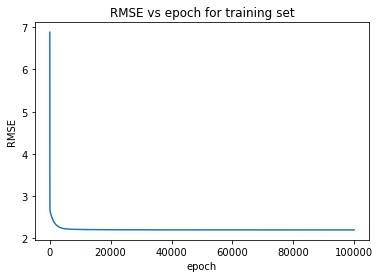

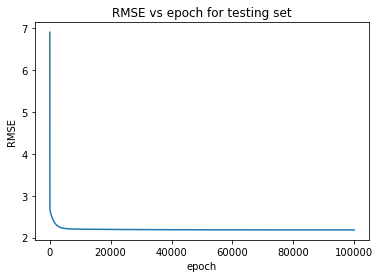

In [174]:
allJMean=np.array(allJ).mean(axis=0)
allJTestMean=np.mean(np.array(allJTest),axis=0)
# print(np.array(allJTest).shape)
# print(allJTestMean)
allJ=np.array(allJ)
allJTest=np.array(allJTest)
# print(allJ[:25])
plt.plot(allJ)
plt.title("RMSE vs epoch for training set")
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.show()
plt.plot(allJTest)
plt.title("RMSE vs epoch for testing set")
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.show()

In [182]:
def ridgeRegression(x,y,learningRate,theta,L,epoch,testingX,testingY):
    
    m=x.shape[0]  #number of entries in data
    allJ=[]
    allJTest=[]
    
    for i in range(epoch):
        tempCost=(x.T@(np.matmul(x,theta)-y))/m
        tempCost+=L*np.sum(theta)
        theta-=(learningRate)*tempCost
        allJ.append(cost(x,y,theta))
        allJTest.append(cost(testingX,testingY,theta))
    
    return theta, allJ, allJTest

In [188]:
alphas=[0.0001,0.001,0.01,0.1,0.5,1,10,100,50,0.000001]
hashyAlphasInfo={}

for alpha in alphas:
    
    
    theta=np.zeros((trainingX.shape[1],1))

    theta, allJRidge, allJTestRidge = ridgeRegression(trainingX,trainingY,0.1,theta,alpha,100000,testingX,testingY) #we have a learning rate of 0.1 and 100000 epoch

    J=cost(trainingX,trainingY,theta)
    JTest=cost(testingX,testingY,theta)
    print("Values for alpha = ",alpha)
    print("cost training for ridge regression: ",J)
    print("parameters for ridge regression: ", theta)
    print("cost testing for ridge regression",JTest)
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n\n\n")
    hashyAlphasInfo[alpha]=[{"training cost":J},{"testing cost":JTest},{"parameters":theta}]
    
print(hashyAlphasInfo)


Values for alpha =  0.0001
cost training for ridge regression:  2.2015886488834258
parameters for ridge regression:  [[  3.29008938]
 [  0.41401679]
 [  0.72132708]
 [  9.49415559]
 [  8.74074988]
 [  9.46916765]
 [-20.1242855 ]
 [-11.53618227]
 [  9.27308207]]
cost testing for ridge regression 2.182764115662554
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx



Values for alpha =  0.001
cost training for ridge regression:  2.2077680485599673
parameters for ridge regression:  [[  3.3688805 ]
 [  0.42662436]
 [  2.03290966]
 [  8.28585615]
 [  6.39109397]
 [ 11.45490664]
 [-21.71799377]
 [-14.36481254]
 [  7.08139076]]
cost testing for ridge regression 2.186931394233653
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx



Values for alpha =  0.01
cost training for ridge regression:  2.211721984929314
parameters for ridge regression:  [[  3.39877261]
 [  0.43145914]
 [  2.54758961]
 [  7.80582251]
 [  5.49625218]
 [ 12.2111364 ]
 [-22.3250438 ]
 [-15.44231734]
 [  6.24805536]]
cost testi

c:\users\utkarsh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in matmul
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\utkarsh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in matmul
  
c:\users\utkarsh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in matmul
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\utkarsh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in matmul
  


Values for alpha =  10
cost training for ridge regression:  nan
parameters for ridge regression:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
cost testing for ridge regression nan
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx



Values for alpha =  100
cost training for ridge regression:  nan
parameters for ridge regression:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
cost testing for ridge regression nan
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx



Values for alpha =  50
cost training for ridge regression:  nan
parameters for ridge regression:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
cost testing for ridge regression nan
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx



Values for alpha =  1e-06
cost training for ridge regression:  2.2007891126983776
parameters for ridge regression:  [[  3.25117567]
 [  0.40794238]
 [  0.11347976]
 [ 10.04258679]
 [  9.888051  ]
 [  8.50434021]
 [-19.35020347]
 [-10.16286053]

In [187]:
print(hashyAlphasInfo)

{0.1: [{'training cost': 2.2122955621436295}, {'testing cost': 2.190015758836337}, {'parameters': array([[  3.40261487],
       [  0.43208315],
       [  2.61439853],
       [  7.74336516],
       [  5.38090419],
       [ 12.30860609],
       [-22.40329336],
       [-15.58121094],
       [  6.14068255]])}], 0.2: [{'training cost': 2.212328751992697}, {'testing cost': 2.1900384071154804}, {'parameters': array([[  3.40283418],
       [  0.43211878],
       [  2.61821621],
       [  7.73979522],
       [  5.37431805],
       [ 12.31417139],
       [-22.40776128],
       [-15.58914155],
       [  6.13455203]])}], 0.3: [{'training cost': 2.2123398474202567}, {'testing cost': 2.1900459785777913}, {'parameters': array([[  3.40290742],
       [  0.43213069],
       [  2.61949133],
       [  7.73860283],
       [  5.37211838],
       [ 12.3160301 ],
       [-22.40925349],
       [-15.59179024],
       [  6.13250454]])}], 0.4: [{'training cost': 2.2123454011786596}, {'testing cost': 2.1900497684

Optimal hyperparameter:  0.6365079081295572
cost training for ridge regression:  2.2123515967820633
parameters for ridge regression:  [[  3.40298495]
 [  0.43214328]
 [  2.62084097]
 [  7.73734074]
 [  5.36979022]
 [ 12.31799739]
 [-22.41083287]
 [-15.59459366]
 [  6.13033745]]
cost testing for ridge regression 2.1900539963364913


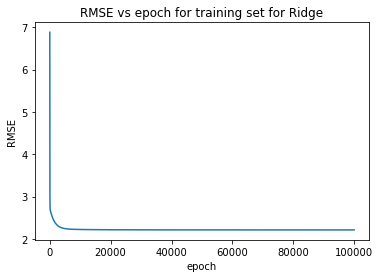

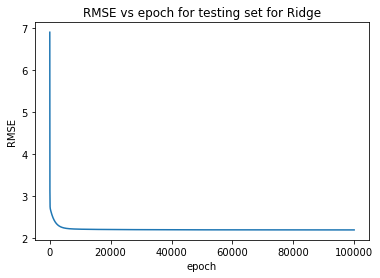

In [183]:
alphas = np.logspace(-4,1,1000)
model = Ridge()
grid = GridSearchCV(estimator=model,param_grid=dict(alpha=alphas),cv=5)
grid.fit(trainingX,trainingY)
L = grid.best_estimator_.alpha
print("Optimal hyperparameter: ",L)

theta=np.zeros((trainingX.shape[1],1))

theta, allJRidge, allJTestRidge = ridgeRegression(trainingX,trainingY,0.1,theta,L,100000,testingX,testingY) #we have a learning rate of 0.1 and 100000 epoch

J=cost(trainingX,trainingY,theta)
JTest=cost(testingX,testingY,theta)
print("cost training for ridge regression: ",J)
print("parameters for ridge regression: ", theta)
print("cost testing for ridge regression",JTest)

allJRidge=np.array(allJRidge)
allJTestRidge=np.array(allJTestRidge)
plt.plot(allJRidge)
plt.title("RMSE vs epoch for training set for Ridge")
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.show()
plt.plot(allJTestRidge)
plt.title("RMSE vs epoch for testing set for Ridge")
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.show()


In [184]:
def lassoRegression(x,y,learningRate,theta,L,epoch,testingX,testingY):
    
    m=x.shape[0]  #number of entries in data
    allJ=[]
    allJTest=[]
    
    for i in range(epoch):
        tempCost=(x.T@(np.matmul(x,theta)-y))/m
        tempCost+=2*L*np.sum(theta/np.abs(theta))
        theta-=(learningRate)*tempCost
        allJ.append(cost(x,y,theta))
        allJTest.append(cost(testingX,testingY,theta))
    
    return theta, allJ, allJTest

In [ ]:
alphas=[0.0001,0.001,0.01,0.1,0.5,1,10,100,50,0.000001]
hashyAlphasInfoLasso={}

for alpha in alphas:
    
    
    theta=np.zeros((trainingX.shape[1],1))

    theta, allJLasso, allJTestLasso = lassoRegression(trainingX,trainingY,0.1,theta,alpha,100000,testingX,testingY) #we have a learning rate of 0.1 and 100000 epoch

    J=cost(trainingX,trainingY,theta)
    JTest=cost(testingX,testingY,theta)
    print("Values for alpha = ",alpha)
    print("cost training for lasso regression: ",J)
    print("parameters for lasso regression: ", theta)
    print("cost testing for lasso regression",JTest)
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n\n\n")
    hashyAlphasInfoLasso[alpha]=[{"training cost":J},{"testing cost":JTest},{"parameters":theta}]
    
print(hashyAlphasInfoLasso)

Optimal hyperparameter:  0.0023516428844943486
cost training for lasso regression:  2.2099725435296067
parameters for lasso regression:  [[  3.38637182]
 [  0.4294491 ]
 [  2.33296056]
 [  8.00625582]
 [  5.86802646]
 [ 11.89697293]
 [-22.07284195]
 [-14.9946601 ]
 [  6.59418991]]
cost testing for lasso regression 2.18843179255606


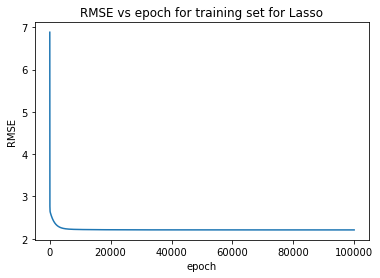

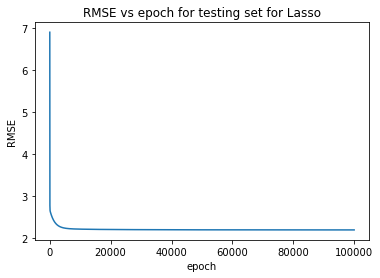

In [185]:
alphas = np.logspace(-4,1,1000)
model = Lasso()
grid = GridSearchCV(estimator=model,param_grid=dict(alpha=alphas),cv=5)
grid.fit(trainingX,trainingY)
L = grid.best_estimator_.alpha
print("Optimal hyperparameter: ",L)

theta=np.zeros((trainingX.shape[1],1))

theta, allJLasso, allJTestLasso = ridgeRegression(trainingX,trainingY,0.1,theta,L,100000,testingX,testingY) #we have a learning rate of 0.1 and 100000 epoch

J=cost(trainingX,trainingY,theta)
JTest=cost(testingX,testingY,theta)
print("cost training for lasso regression: ",J)
print("parameters for lasso regression: ", theta)
print("cost testing for lasso regression",JTest)

allJRidge=np.array(allJLasso)
allJTestRidge=np.array(allJTestLasso)
plt.plot(allJLasso)
plt.title("RMSE vs epoch for training set for Lasso")
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.show()
plt.plot(allJTestLasso)
plt.title("RMSE vs epoch for testing set for Lasso")
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.show()